In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from CCio import load_ccd_file
from CCio import load_folder

from CCplot import auto_plot_style
from CCplot import plot1d
from CCplot import plot2d

In [2]:
%matplotlib inline

auto_plot_style()

In [3]:
folder_before = "/home/gonzalo/data/CC/holder_2020_09_01_13_55_58_978000/" # raw
#folder_before = "/home/gonzalo/data/CC/holder_2020_09_01_14_38_08_396000/" # raw
folder_after  = "/home/gonzalo/data/CC/holder_2020_09_01_17_31_28_162000/" # paint
#folder_after  = "/home/gonzalo/data/CC/holder_2020_09_02_01_29_38_342000/" # paint
#folder_after  = "/home/gonzalo/data/CC/holder_2020_09_02_12_47_03_664000/" # paint
#folder_after  = "/home/gonzalo/data/CC/holder_2020_09_02_13_51_12_837000/" # paint
#folder_after  = "/home/gonzalo/data/CC/holder_2020_09_02_15_17_11_144000/" # paint 1s
#folder_after  = "/home/gonzalo/data/CC/holder_2020_09_02_16_20_48_818000/" # paint 1s

data_before   = load_folder(folder_before)
data_after    = load_folder(folder_after )

/home/gonzalo/sw/git/CC/CCio.py:287: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(dfs)


In [4]:
data_after.head()

baseline  counts  crystal       dquanta      em_wl  ex_wl  exp_index  \
0    3089.0  3095.0        1  2.997220e-09  833.31512  800.0          0   
1    3089.0  3097.0        1  3.996294e-09  833.83295  800.0          0   
2    3089.0  3082.0        1 -3.496757e-09  834.35077  800.0          0   
3    3089.0  3114.0        1  1.248842e-08  834.86853  800.0          0   
4    3089.0  3079.0        1 -4.995367e-09  835.38629  800.0          0   

   exposure  full_scan  grating looparound         power   rate  slit_width  \
0       0.1       True        2        NaN  4.970172e-09   60.0        1000   
1       0.1       True        2        NaN  4.970172e-09   80.0        1000   
2       0.1       True        2        NaN  4.970172e-09  -70.0        1000   
3       0.1       True        2        NaN  4.970172e-09  250.0        1000   
4       0.1       True        2        NaN  4.970172e-09 -100.0        1000   

   state     timestamp  
0      0  1.598964e+09  
1      0  1.598964e+09  
2      0  1.598964e+09  
3      0  1.598964e+09  
4      0  1.598964e+09

/home/gonzalo/sw/anaconda3/envs/CC/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


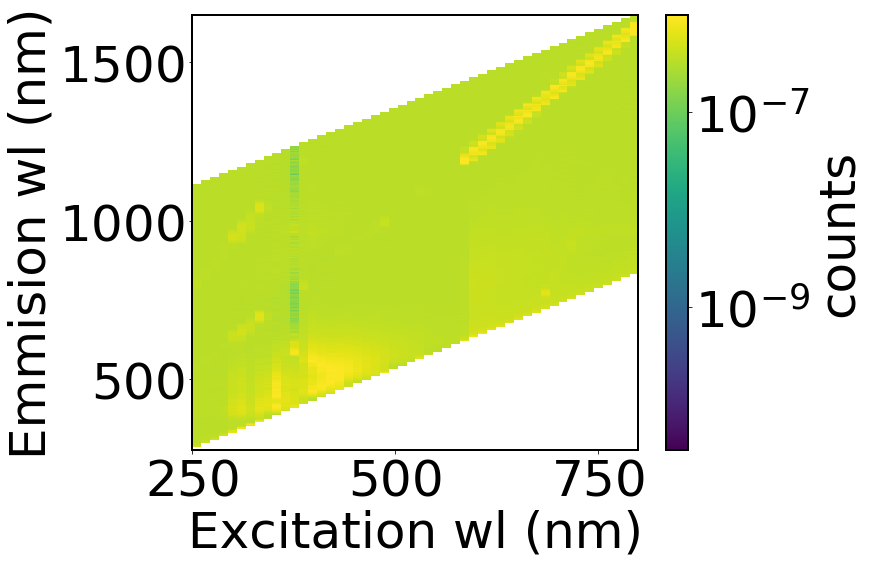

In [9]:
plot2d(data_before.ex_wl, data_before.em_wl, data_before.dquanta + np.abs(data_before.dquanta.min() * 1.0001),
       cmax=1e-6, vmax=1e-6, log=True);

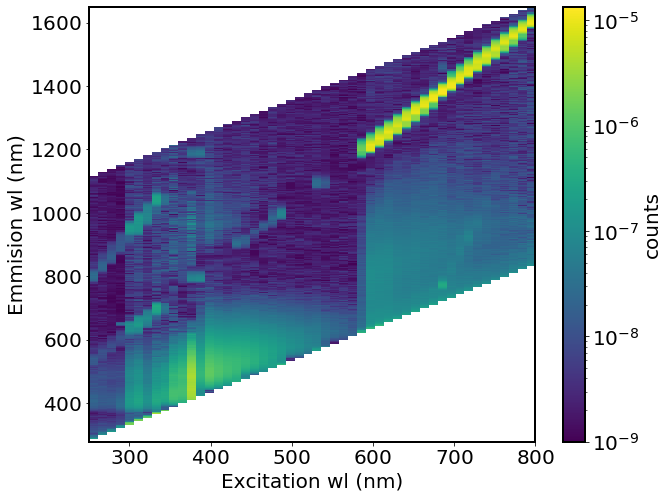

In [15]:
plt.rcParams["font.size"] = 20

d = data_before#.loc[(data_before.ex_wl > 330) & (data_before.ex_wl < 600)]
plot2d(d.ex_wl, d.em_wl, d.dquanta, log=True, cmin=1e-9, vmin=1e-9);

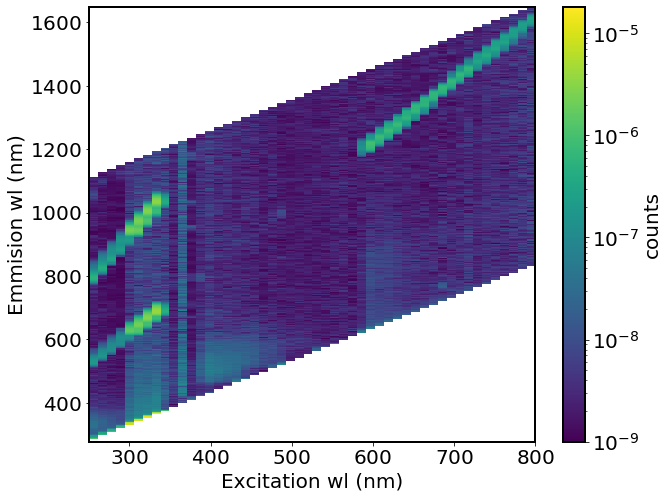

In [13]:
plt.rcParams["font.size"] = 20

d = data_after#.loc[(data_after.ex_wl > 330) & (data_after.ex_wl < 600)]
plot2d(d.ex_wl, d.em_wl, d.dquanta, log=True, cmin=1e-9, vmin=1e-9);

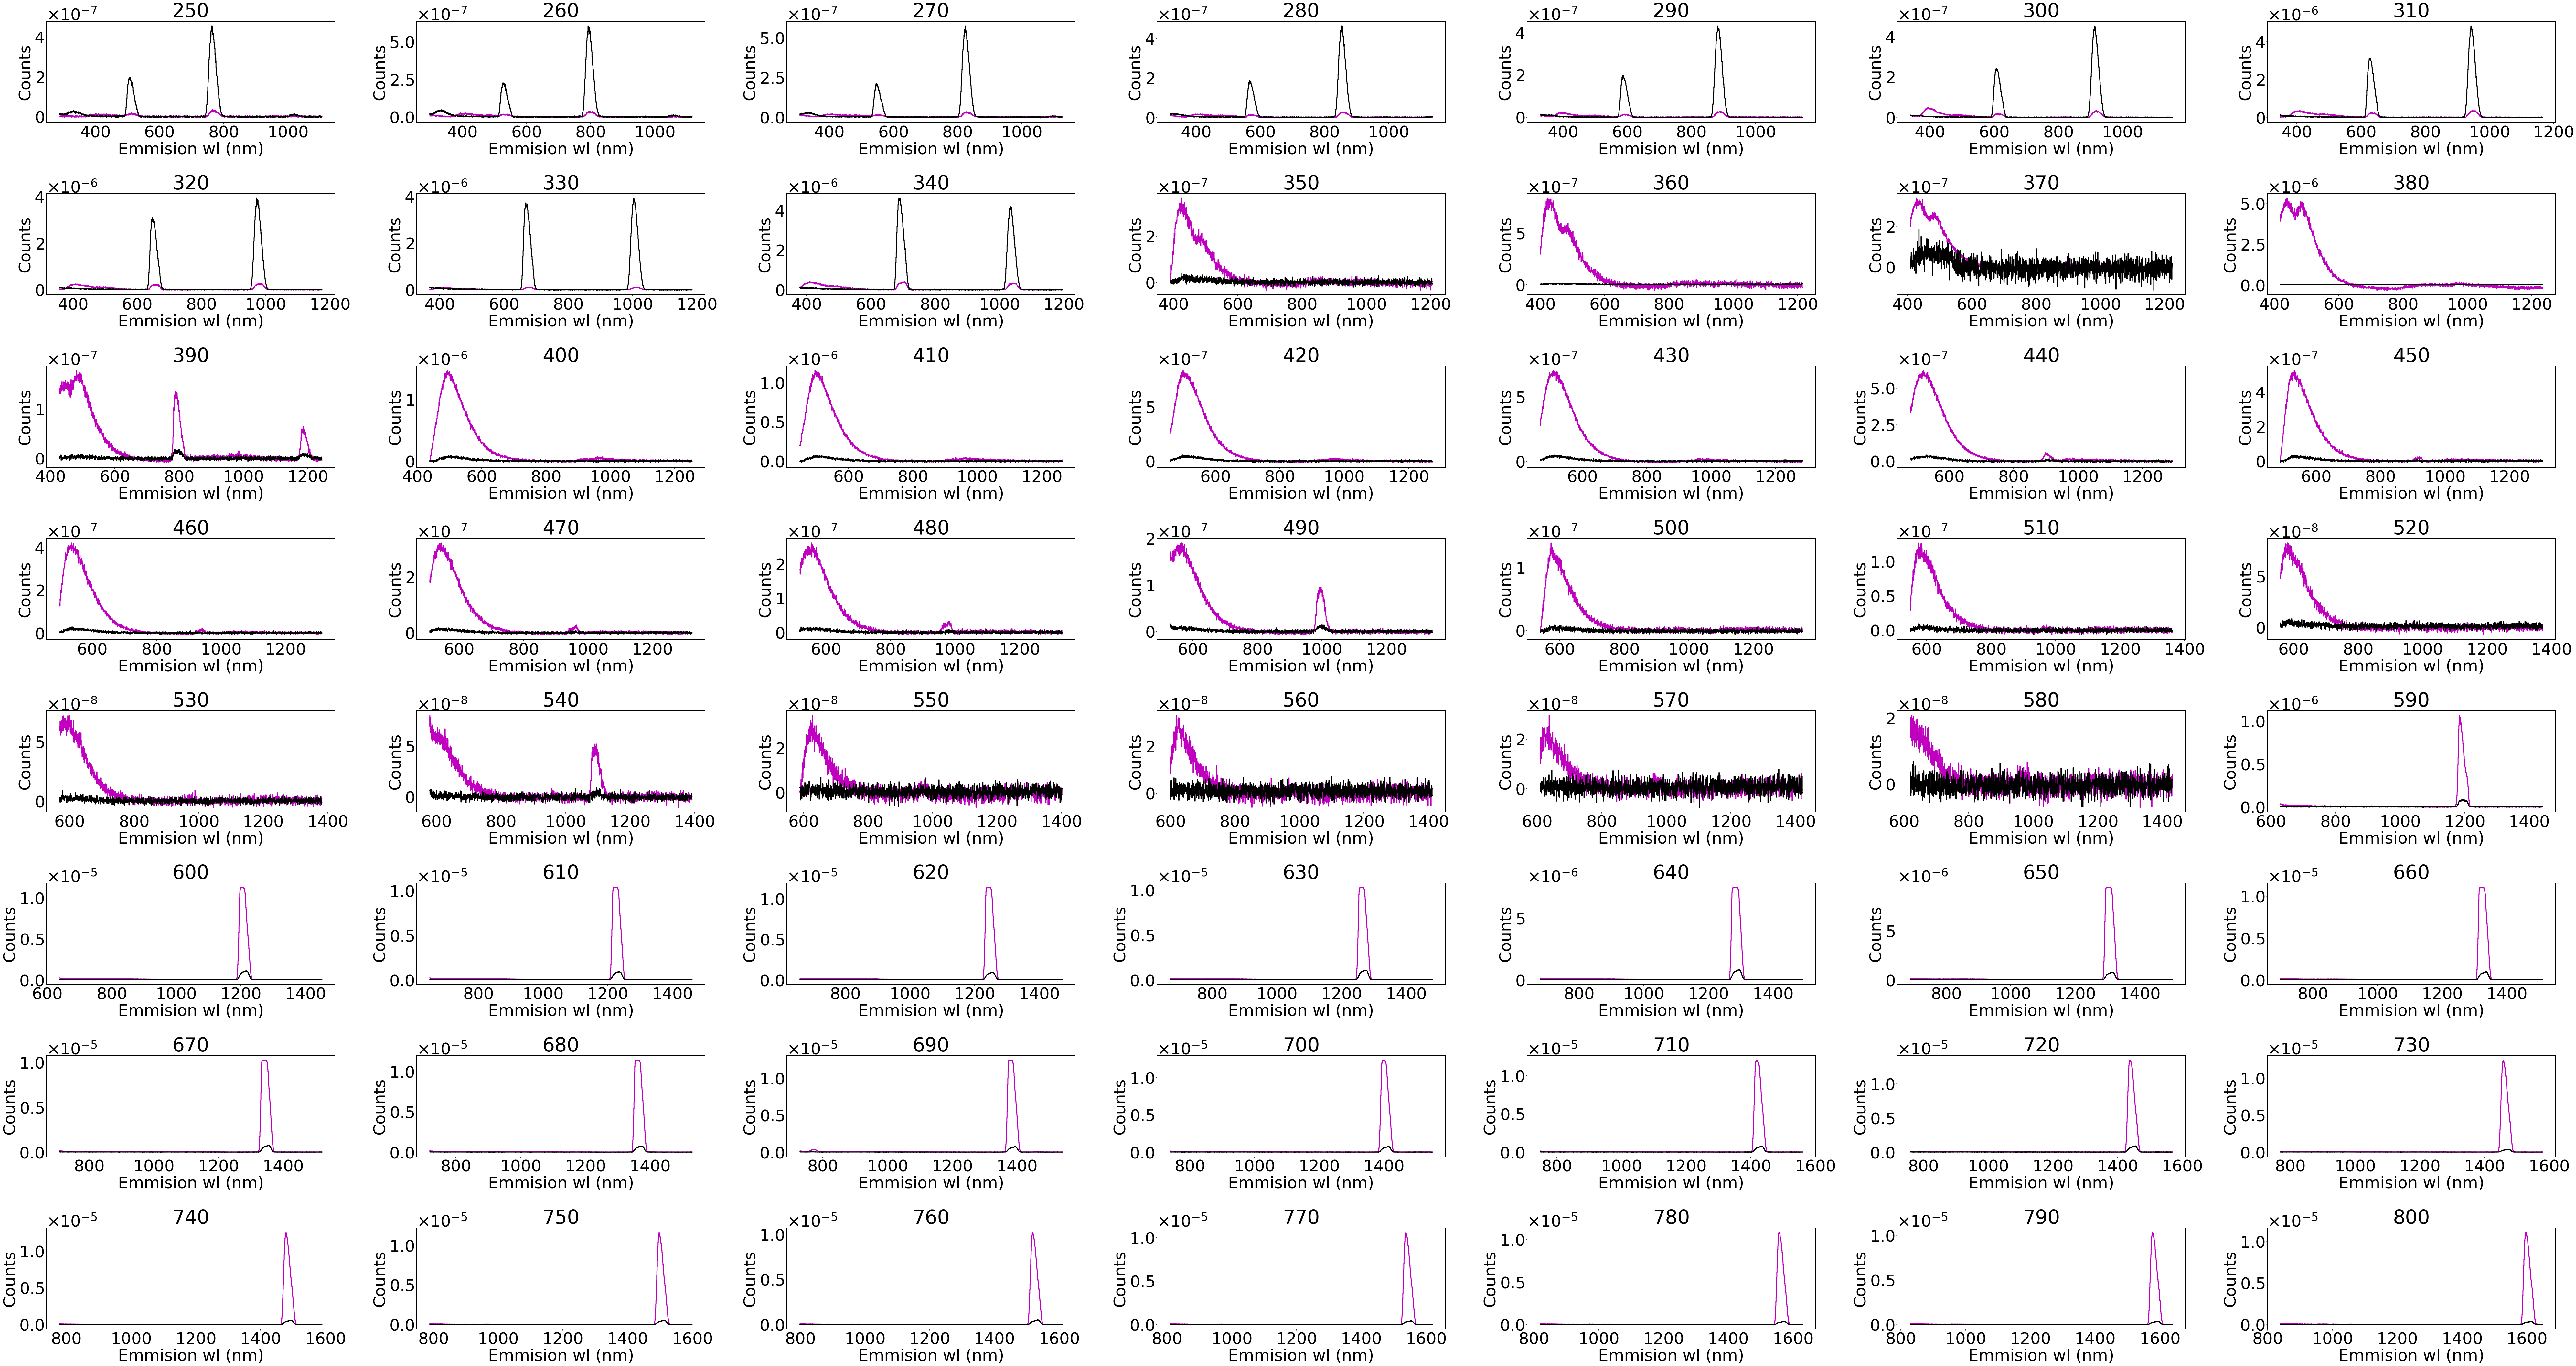

In [8]:
plt.figure(figsize=(16*7, 10*6))

plt.rcParams["font.size"] = 50

before = data_before.groupby("ex_wl")
after  = data_after .groupby("ex_wl")

for exwl in sorted(data_before.ex_wl.drop_duplicates()):
    plt.subplot(8, 7, (exwl - 240) // 10)
    
    b = before.get_group(exwl).loc[lambda x: x.em_wl > exwl + 40]
    a = after .get_group(exwl).loc[lambda x: x.em_wl > exwl + 40]
    plot1d(b.em_wl, b.dquanta, color="m")
    plot1d(a.em_wl, a.dquanta, title=f"{exwl:.0f}", color="k")
plt.tight_layout()

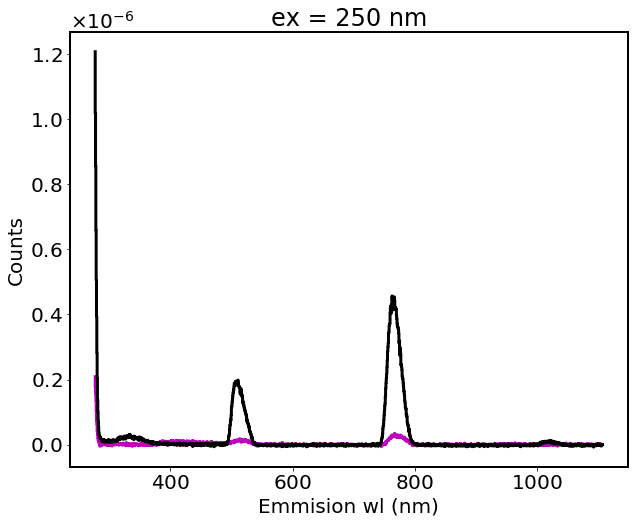

In [22]:
plt.rcParams["font.size"] = 20

before = data_before.loc[lambda x: x.ex_wl == 250]
after  = data_after .loc[lambda x: x.ex_wl == 250]

plot1d(before.em_wl, before.dquanta, color="m")
plot1d(after .em_wl, after .dquanta, title="ex = 250 nm", color="k")


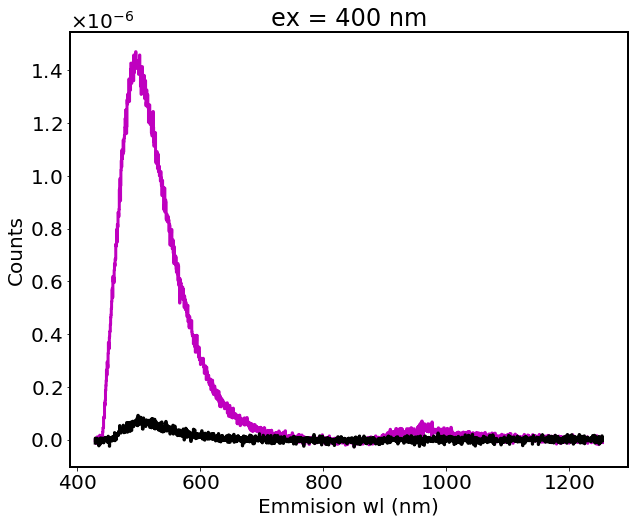

In [24]:
plt.rcParams["font.size"] = 20

before = data_before.loc[lambda x: x.ex_wl == 400]
after  = data_after .loc[lambda x: x.ex_wl == 400]

plot1d(before.em_wl, before.dquanta, color="m")
plot1d(after .em_wl, after .dquanta, title="ex = 400 nm", color="k")


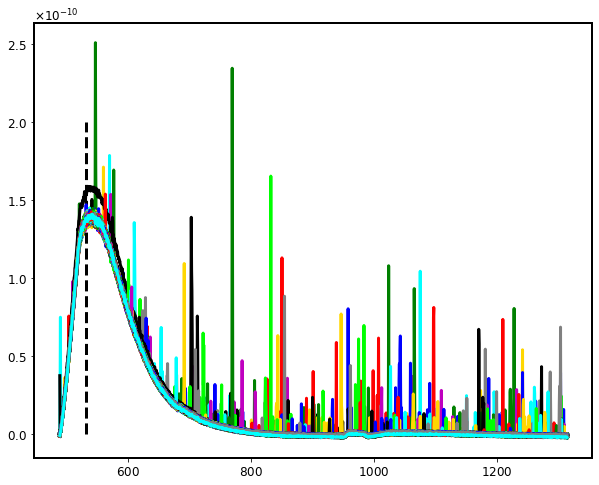

In [57]:
for _, state in data_6.groupby("state"):
    plt.plot(state.em_wl, state.dquanta);

plt.vlines(533, 0, 2e-10, linestyles="--")

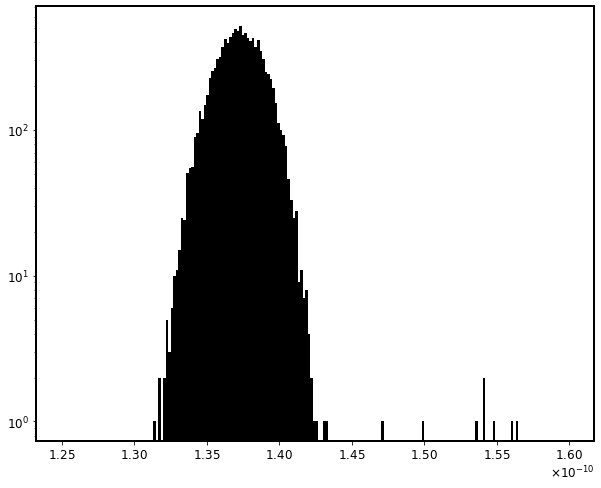

In [58]:
peak = data_6.loc[lambda x: (x.em_wl > 531) & (x.em_wl < 535)]
plt.hist(peak.dquanta, np.linspace(1.25e-10, 1.6e-10, 201))
plt.yscale("log")

In [41]:
integrals = data_6.groupby("state").apply(integrate, column="counts")

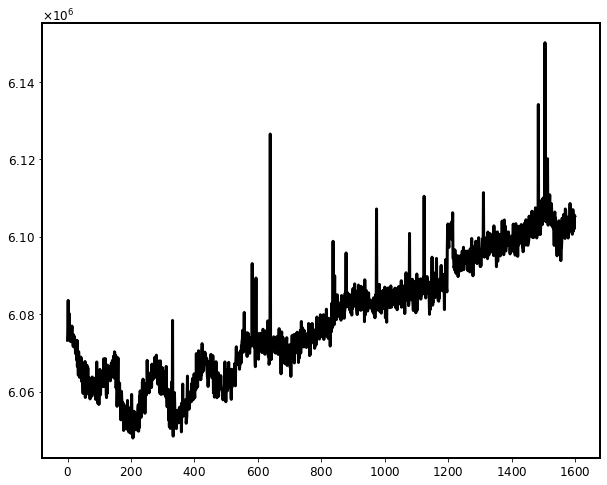

In [42]:
plt.plot(integrals)

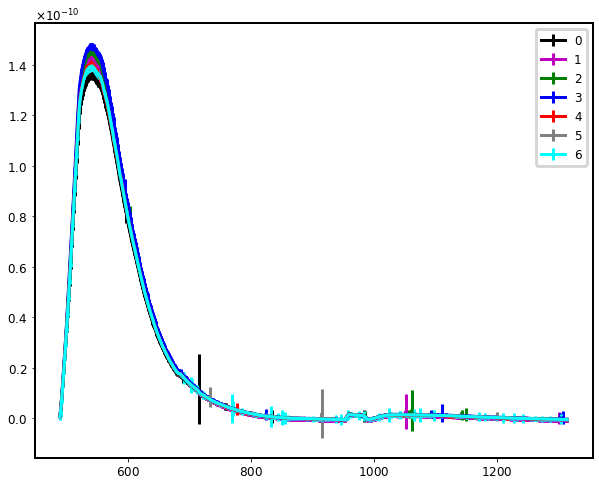

In [5]:
for i, data in enumerate(datas):
    df = data.groupby("em_wl", as_index=False).dquanta.agg(dict(mu="mean", sig="std"))
    plt.errorbar(df.em_wl, df.mu, df.sig, label=str(i))

plt.legend()

In [7]:
15*60/11*20

1636.3636363636363